In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [263]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Analysis Data

## Portfolio

id (string) - offer id 
offer_type (string) - type of offer ie BOGO, discount, informational 
difficulty (int) - minimum required spend to complete an offer 
reward (int) - reward given for completing an offer 
duration (int) - time for offer to be open, in days 
channels (list of strings) """

In [264]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


## Transcript

In [265]:
transcript.sample(10)

,person,event,value,time
113955,6ccf170a9dc044b7947456417852bc43,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},336
236658,10c8734cbcc744a1975c581e4382d168,transaction,{'amount': 1.0},546
23151,5000aa9e8fc84433a6bb022471ec1578,transaction,{'amount': 18.3},24
28421,bc732350a9684a669cc72bea24c48e4c,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,42
154250,52795bbd3ca440acb6c213dc17628b99,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},408
304861,1615981b0a114e42bc1b0f65b2ac4c8b,offer viewed,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},708
118555,c14688e439ac4629b82c0144a93bdcf1,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},336
22552,50957b9a771f4e5d9df530c13a1184f1,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},24
83860,e3d7fa1e32ac4eeb9003f2b9af563ac8,transaction,{'amount': 0.9500000000000001},210
110225,394959bac98241098e68e063d28687e0,transaction,{'amount': 0.18},330


In [266]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [267]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

## Profiles

In [268]:
profile.sample(10)

,gender,age,id,became_member_on,income
7015,None,118,0223ed57fef54575ac0b256937dc68fa,20170624,NaN
388,M,35,027596e6ed19471392923eb833b25fd3,20170829,64000.0
9123,M,25,4c7588114f90431095e3ee47988ff530,20171222,58000.0
1722,F,64,2c49fcc99b194fbd98c68f159a01da87,20160913,72000.0
5388,F,35,1ce8e5faa25f4daabdf8c43c1168cb17,20170720,33000.0
13133,M,38,3b346dd87f574892b5080d676b4e69ff,20170708,56000.0
14707,F,49,24be0137591244c7b191b11c0da21218,20160308,72000.0
3268,M,59,cc21c82c8f074b6c9b44ce98a1917bfd,20160808,60000.0
15641,O,48,3d6dda5a29c345fa99982972c7012b15,20170623,94000.0
14916,None,118,c134adbefe8449ff9004f03d0cdf11f7,20161219,NaN


In [269]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

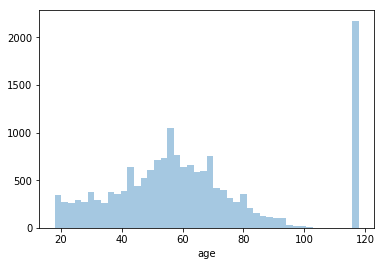

In [270]:
sns.distplot(profile.age,kde=False) 

In [271]:
profile[profile['age']>110]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [272]:
profile_df = profile.copy()

In [273]:
profile_df.dropna(inplace=True)
profile_df.reset_index(drop=True, inplace=True)

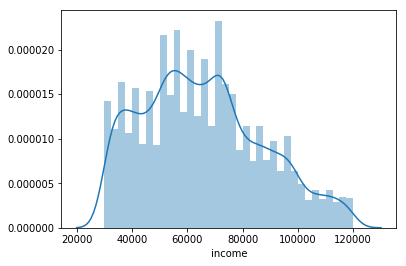

In [274]:
sns.distplot(profile_df.income)

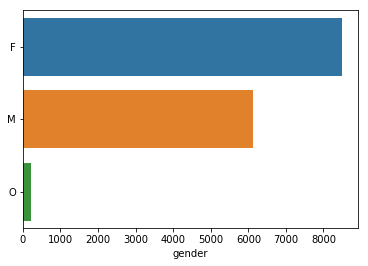

In [275]:
gender_count = profile_df.gender.value_counts()
genders = profile_df.gender.unique()
sns.barplot(gender_count,y=genders)

In [276]:
ages_df = profile_df
ages_df.loc[(profile_df['age'] >10) & (profile_df['age'] <=19 ), 'Age'] = "10's"
ages_df.loc[(profile_df['age'] > 20) & (profile_df['age'] <= 29), 'Age'] = "20's"
ages_df.loc[(profile_df['age'] > 30) & (profile_df['age'] <= 39), 'Age'] = "30's"
ages_df.loc[(profile_df['age'] > 40) & (profile_df['age'] <= 49), 'Age'] = "40's"
ages_df.loc[(profile_df['age'] > 50) & (profile_df['age'] <= 59), 'Age'] = "50's"
ages_df.loc[(profile_df['age'] > 60) & (profile_df['age'] <= 69), 'Age'] = "60's"
ages_df.loc[(profile_df['age'] > 70) & (profile_df['age'] <= 79), 'Age'] = "70's"
ages_df.loc[(profile_df['age'] > 80) & (profile_df['age'] <= 89), 'Age'] = "80's"
ages_df.loc[(profile_df['age'] > 90) & (profile_df['age'] <= 99), 'Age'] = "90's"
ages_df.loc[profile_df['age'] > 100, 'Age'] = "100's"

In [277]:
female_df = ages_df[ages_df['gender'] == 'F']
male_df = ages_df[ages_df['gender'] == 'M']
other_df = ages_df[ages_df['gender'] == 'O']

Text(0.5,1,'Other income')

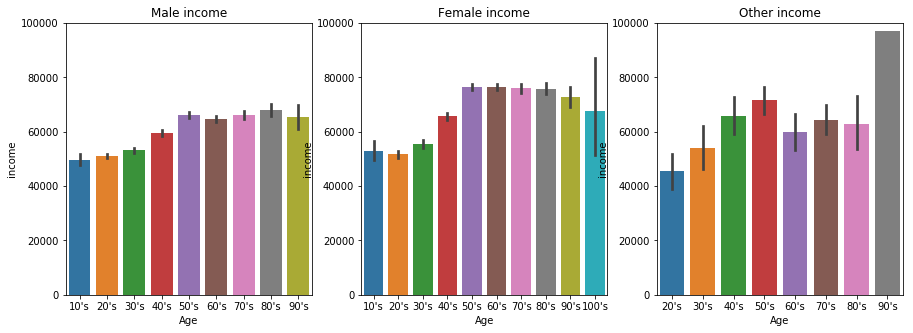

In [278]:
fig,ax = plt.subplots(figsize=(15,5),
                    nrows=1,
                    ncols=3)
plt.sca(ax[0])
male_age = male_df.sort_values(by='age')
sns.barplot(x=male_age.Age,y=male_df.income)
plt.ylim(0,100000)
plt.title('Male income')

plt.sca(ax[1])
female_age = female_df.sort_values(by='age')
sns.barplot(x=female_age.Age,y=female_df.income)
plt.ylim(0,100000)
plt.title('Female income')

plt.sca(ax[2])
other_age = other_df.sort_values(by='age')
plt.ylim(0,100000)
sns.barplot(x=other_age.Age,y=other_df.income)
plt.title('Other income')

In [279]:
from datetime import date

actual_date = date.today()
actual_date = pd.to_datetime(actual_date)
profile_df['became_member_on'] = pd.to_datetime(profile_df['became_member_on'], format='%Y%m%d')
profile_df.became_member_on = (actual_date - profile_df['became_member_on'])/np.timedelta64(1,'D')
profile_df.rename(columns={'became_member_on': 'membership_days'}, inplace=True)

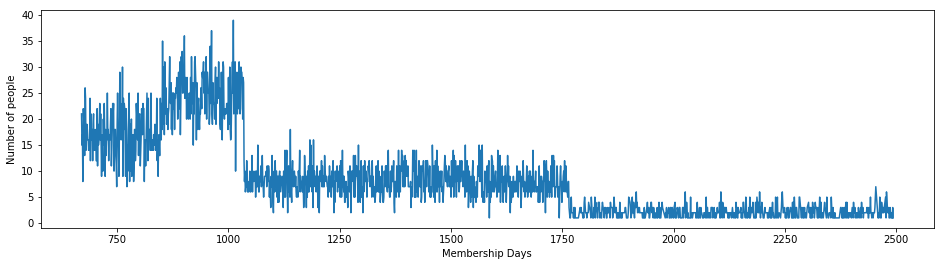

In [280]:
member = profile_df.groupby(['membership_days'])['id'].count()
plt.figure(figsize=(16,4))
plt.xlabel('Membership Days')
plt.ylabel('Number of people')
plt.plot(member)

In [281]:
#Encoding gender
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()
profile_encoded = encoder.fit(profile_df['gender'])
gender_df = pd.DataFrame(profile_encoded.transform(profile_df['gender']),columns=profile_encoded.classes_)
profile_df = profile_df.drop(columns=['gender'],axis=1)
profile_df = pd.concat([profile_df,gender_df],axis=1)

In [282]:
profile_df

,age,id,membership_days,income,Age,F,M,O
0,55,0610b486422d4921ae7d2bf64640c50b,1046.0,112000.0,50's,1,0,0
1,75,78afa995795e4d85b5d9ceeca43f5fef,1113.0,100000.0,70's,1,0,0
2,68,e2127556f4f64592b11af22de27a7932,761.0,70000.0,60's,0,1,0
3,65,389bc3fa690240e798340f5a15918d5c,837.0,53000.0,60's,0,1,0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,927.0,51000.0,50's,0,1,0
...,...,...,...,...,...,...,...,...
14820,45,6d5f3a774f3d4714ab0c092238f3a1d7,722.0,54000.0,40's,1,0,0
14821,61,2cb4f97358b841b9a9773a7aa05a9d77,683.0,72000.0,60's,0,1,0
14822,49,01d26f638c274aa0b965d24cefe3183f,1216.0,73000.0,40's,0,1,0
14823,83,9dc1421481194dcd9400aec7c9ae6366,1541.0,50000.0,80's,1,0,0


In [283]:
portfolio_df = portfolio.copy()

In [284]:
transcript_df = transcript.copy()
transcript_df.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [285]:
transcript_df.sample(10)

,person,event,value,time
164248,6731c03f14924f00b9c7507d9490657c,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408
193135,17cd1a02965e439da1f0029d50792c56,transaction,{'amount': 16.37},468
3393,cd9bac9e8aea4609929a55b9b468c88e,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
11850,73c456d983484fbb884aa78ac723c36b,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
12489,2dfb4bd2746d441393a3f2ed9ef03ce5,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
265792,e242bb9c734c4c6093feadfd95cf5e87,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,588
275191,079a60e8e7694ffb8d9a4ddf45e85897,transaction,{'amount': 15.12},606
52063,65824e7a3bd14f29a344c0a9f3f47e8d,transaction,{'amount': 9.26},156
139656,dd31ce6c87d34180ba57901368e03b33,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},372
250610,50c3063af3c04074b817b1488e238e66,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576


In [286]:
event_df = transcript_df
event_df['event'] = event_df.event.str.replace(' ','_')
response_df = event_df.copy()
trans_encod =pd.get_dummies(event_df['event'])
event_df = pd.concat([event_df,trans_encod],axis=1)
event_df = event_df.drop(columns=['event'],axis=1)

In [287]:
event_df = event_df.set_index('person')
profile_df = profile_df.set_index('id')

In [288]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 0610b486422d4921ae7d2bf64640c50b to e4052622e5ba45a8b96b59aba68cf068
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              14825 non-null  int64  
 1   membership_days  14825 non-null  float64
 2   income           14825 non-null  float64
 3   Age              13308 non-null  object 
 4   F                14825 non-null  int32  
 5   M                14825 non-null  int32  
 6   O                14825 non-null  int32  
dtypes: float64(2), int32(3), int64(1), object(1)
memory usage: 752.8+ KB


In [289]:
#profile_df = profile_df.reset_index()
profile_df = profile_df.rename(columns ={'id': 'person'})

In [290]:
profile_df

,age,membership_days,income,Age,F,M,O
id,,,,,,,
0610b486422d4921ae7d2bf64640c50b,55,1046.0,112000.0,50's,1,0,0
78afa995795e4d85b5d9ceeca43f5fef,75,1113.0,100000.0,70's,1,0,0
e2127556f4f64592b11af22de27a7932,68,761.0,70000.0,60's,0,1,0
389bc3fa690240e798340f5a15918d5c,65,837.0,53000.0,60's,0,1,0
2eeac8d8feae4a8cad5a6af0499a211d,58,927.0,51000.0,50's,0,1,0
...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,45,722.0,54000.0,40's,1,0,0
2cb4f97358b841b9a9773a7aa05a9d77,61,683.0,72000.0,60's,0,1,0
01d26f638c274aa0b965d24cefe3183f,49,1216.0,73000.0,40's,0,1,0


In [291]:
merged_df = profile_df.merge(event_df, left_index=True, right_index=True)

In [292]:
female_df = merged_df[merged_df['F'] == 1]
male_df = merged_df[merged_df['M'] == 1]
other_df = merged_df[merged_df['O'] == 1]

In [293]:
def plotOffer(df,df_name):
    receivedOffer = df.offer_received.sum()
    viewedOffer = df.offer_viewed.sum()
    completedOffer = df.offer_completed.sum()
    #d = 'offer_received':[receivedOffer],'offer_viewed':[viewedOffer],'offer_completed':[completedOffer]}
    diff_r_v = ((receivedOffer-viewedOffer)/receivedOffer) * 100
    diff_v_c = ((viewedOffer-completedOffer)/viewedOffer) * 100
    diff_r_c = ((receivedOffer-completedOffer)/receivedOffer) * 100
    
    print(df_name + ' diffrence Received and Viewed: -{:.2f}%'.format(diff_r_v))
    print(df_name + ' diffrence Viewed and Completed: -{:.2f}%'.format(diff_v_c))
    print(df_name + ' diffrence Received and Completed: -{:.2f}%'.format(diff_r_c))
    print('\n')
    return [receivedOffer,viewedOffer,completedOffer]

Male diffrence Received and Viewed: -25.78%
Male diffrence Viewed and Completed: -41.82%
Male diffrence Received and Completed: -56.82%


Female diffrence Received and Viewed: -24.29%
Female diffrence Viewed and Completed: -25.54%
Female diffrence Received and Completed: -43.63%


Others diffrence Received and Viewed: -15.61%
Others diffrence Viewed and Completed: -35.19%
Others diffrence Received and Completed: -45.31%




Text(0.5,1,'Other offers')

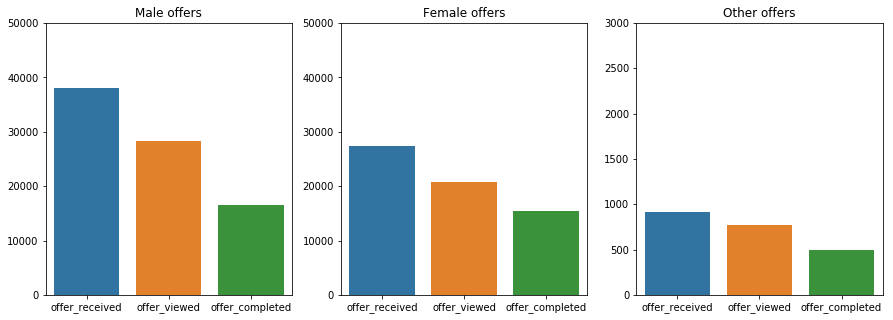

In [294]:
fig,ax = plt.subplots(figsize=(15,5),
                    nrows=1,
                    ncols=3)
offers = ['offer_received','offer_viewed','offer_completed']
plt.sca(ax[0])
sns.barplot(x=offers,y=plotOffer(male_df , 'Male'))
plt.ylim(0,50000)
plt.title('Male offers')

plt.sca(ax[1])
sns.barplot(x=offers,y=plotOffer(female_df,'Female'))
plt.ylim(0,50000)
plt.title('Female offers')

plt.sca(ax[2])
sns.barplot(x=offers,y=plotOffer(other_df,'Others'))
plt.ylim(0,3000)
plt.title('Other offers')

In [295]:
completed_df = response_df[response_df['event'] == 'offer_completed'].copy()
completed_df = pd.concat([completed_df, completed_df['value'].apply(pd.Series)], axis=1)
completed_df.drop(['value','reward','time'],inplace=True, axis=1)
completed_df.drop_duplicates(inplace=True)

In [296]:
completed_df

,person,event,offer_id
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer_completed,2906b810c7d4411798c6938adc9daaa5
12672,fe97aa22dd3e48c8b143116a8403dd52,offer_completed,fafdcd668e3743c1bb461111dcafc2a4
12679,629fc02d56414d91bca360decdfa9288,offer_completed,9b98b8c7a33c4b65b9aebfe6a799e6d9
12692,676506bad68e4161b9bbaffeb039626b,offer_completed,ae264e3637204a6fb9bb56bc8210ddfd
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer_completed,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...
306470,452cdae2c68e4732a4177d3929562690,offer_completed,fafdcd668e3743c1bb461111dcafc2a4
306475,0c027f5f34dd4b9eba0a25785c611273,offer_completed,2298d6c36e964ae4a3e7e9706d1fb8c2
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer_completed,2298d6c36e964ae4a3e7e9706d1fb8c2
306509,8431c16f8e1d440880db371a68f82dd0,offer_completed,fafdcd668e3743c1bb461111dcafc2a4


In [297]:
viewed_df = response_df[response_df['event'] == 'offer_viewed'].copy()
viewed_df = pd.concat([viewed_df, viewed_df['value'].apply(pd.Series)], axis=1)
viewed_df.drop(['value','time'],inplace=True, axis=1)
viewed_df.rename(columns={'offer id': 'offer_id'},inplace=True)
viewed_df.drop_duplicates(inplace=True)

In [298]:
completed_and_viewed = viewed_df.merge(completed_df,how='left',on=['person','offer_id'])

In [299]:
completed_and_viewed.rename(columns={'event_x': 'offer_viewed', 'event_y': 'offer_completed'},inplace=True)

In [300]:
completed_and_viewed['offer_viewed']= completed_and_viewed.offer_viewed.apply(lambda x: 1 if x == 'offer_viewed' else 0)

In [301]:
completed_and_viewed['offer_completed']= completed_and_viewed.offer_completed.apply(lambda x: 1 if x == 'offer_completed' else 0)

In [302]:
completed_and_viewed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49135 entries, 0 to 49134
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   person           49135 non-null  object
 1   offer_viewed     49135 non-null  int64 
 2   offer_id         49135 non-null  object
 3   offer_completed  49135 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [303]:
def return_response(df):
    if (df.offer_completed == 1) & (df.offer_viewed == 1):
        response = 1
    else:
        response = 0
    return response

In [304]:
completed_and_viewed['response'] = completed_and_viewed.apply(return_response,axis=1)

In [305]:
completed_and_viewed.drop(['offer_viewed','offer_completed'],axis=1,inplace=True)

In [306]:
completed_and_viewed.shape

(49135, 3)

In [307]:
profile_df.reset_index(inplace=True)
profile_df = profile_df.rename(columns={'id':'person'})

In [308]:
final_df = completed_and_viewed.merge(profile_df,how='left',on='person')
final_df.dropna(inplace=True)

In [309]:
final_df

,person,offer_id,response,age,membership_days,income,Age,F,M,O
0,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,1,65.0,837.0,53000.0,60's,0.0,1.0,0.0
1,d1ede868e29245ea91818a903fec04c6,5a8bc65990b245e5a138643cd4eb9837,0,53.0,983.0,52000.0,50's,0.0,0.0,1.0
2,102e9454054946fda62242d2e176fdce,4d5c57ea9a6940dd891ad53e9dbe8da0,1,69.0,1381.0,57000.0,60's,1.0,0.0,0.0
4,be8a5d1981a2458d90b255ddc7e0d174,5a8bc65990b245e5a138643cd4eb9837,0,39.0,2191.0,51000.0,30's,0.0,1.0,0.0
5,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,1,42.0,1591.0,96000.0,40's,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
49126,345f9431137a49b3963221a55567c4a8,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,53.0,1147.0,77000.0,50's,0.0,1.0,0.0
49127,5a3f7fcb450a4cb693ab5267b4d49b40,5a8bc65990b245e5a138643cd4eb9837,0,59.0,951.0,102000.0,50's,1.0,0.0,0.0
49129,ec1761735b034ae8874bc979f0cd5862,5a8bc65990b245e5a138643cd4eb9837,0,56.0,1391.0,103000.0,50's,1.0,0.0,0.0
49132,84fb57a7fe8045a8bf6236738ee73a0f,5a8bc65990b245e5a138643cd4eb9837,0,64.0,1076.0,113000.0,60's,1.0,0.0,0.0


In [310]:
final_df = final_df[(final_df.offer_id != '3f207df678b143eea3cee63160fa8bed') & (final_df.offer_id != '5a8bc65990b245e5a138643cd4eb9837')]

In [311]:
offer_dummies =pd.get_dummies(portfolio_df['offer_type'])
portfolio_df = pd.concat([portfolio_df,offer_dummies],axis=1)
portfolio_df = portfolio_df.drop(columns=['offer_type'],axis=1)

In [312]:
"Encoding channel featurees"
from sklearn.preprocessing import MultiLabelBinarizer

encoder = MultiLabelBinarizer()

cat_encoded = encoder.fit(portfolio['channels'])
channels_df = pd.DataFrame(cat_encoded.transform(portfolio['channels']),columns=cat_encoded.classes_)
portfolio_df = portfolio_df.drop(columns=['channels'],axis=1)
portfolio_df = portfolio_df.rename(columns={'id':'offer_id'})
portfolio_df = pd.concat([portfolio_df,channels_df],axis=1)
portfolio_df

,reward,difficulty,duration,offer_id,bogo,discount,informational,email,mobile,social,web
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,1,1,1,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0,1,1,1,1
2,0,0,4,3f207df678b143eea3cee63160fa8bed,0,0,1,1,1,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,1,1,0,1
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,1,0,0,1
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0,1,1,1,1
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,1,1,1,1
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,1,0
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0,1,1,1,1
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,0,1,0,1,1,0,1


In [313]:
portfolio_df = portfolio_df.drop(['reward','difficulty','duration','informational'], axis=1)

In [314]:
portfolio_df

,offer_id,bogo,discount,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,1,0,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,0,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,0,1,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,0,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,1,0,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,0,1,1,1,0,1


In [315]:
final_df = final_df.merge(portfolio_df,how='left', on='offer_id')

In [316]:
final_df['offer_id'] = final_df['offer_id'].map({'f19421c1d4aa40978ebb69ca19b0e20d':'offer_1',
                          '5a8bc65990b245e5a138643cd4eb9837':'offer_2',
                          '4d5c57ea9a6940dd891ad53e9dbe8da0':'offer_3',
                          '2906b810c7d4411798c6938adc9daaa5':'offer_4',
                          '2298d6c36e964ae4a3e7e9706d1fb8c2':'offer_5',
                          'ae264e3637204a6fb9bb56bc8210ddfd':'offer_6',
                          '9b98b8c7a33c4b65b9aebfe6a799e6d9':'offer_7',
                          'fafdcd668e3743c1bb461111dcafc2a4':'offer_8',
                          '3f207df678b143eea3cee63160fa8bed':'offer_9',
                          '0b1e1539f2cc45b7b9fa7c272da2e1d7':'offer_10'})

In [317]:
final_df['offer_id'].unique()

array(['offer_1', 'offer_3', 'offer_4', 'offer_5', 'offer_6', 'offer_7',
       'offer_8', 'offer_10'], dtype=object)

In [318]:
offer_dummies =pd.get_dummies(final_df['offer_id'])
final_df = pd.concat([final_df,offer_dummies],axis=1)
final_df.drop(['offer_id','person','Age'], axis=1, inplace=True)

In [319]:
final_df

,response,age,membership_days,income,F,M,O,bogo,discount,email,...,social,web,offer_1,offer_10,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8
0,1,65.0,837.0,53000.0,0.0,1.0,0.0,1,0,1,...,1,1,1,0,0,0,0,0,0,0
1,1,69.0,1381.0,57000.0,1.0,0.0,0.0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
2,1,42.0,1591.0,96000.0,0.0,1.0,0.0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
3,1,53.0,1420.0,72000.0,1.0,0.0,0.0,0,1,1,...,1,1,0,0,0,0,1,0,0,0
4,0,46.0,697.0,36000.0,1.0,0.0,0.0,0,1,1,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30921,0,68.0,1645.0,59000.0,1.0,0.0,0.0,0,1,1,...,1,1,0,0,0,0,1,0,0,0
30922,1,55.0,893.0,113000.0,1.0,0.0,0.0,1,0,1,...,1,1,1,0,0,0,0,0,0,0
30923,0,51.0,823.0,43000.0,0.0,1.0,0.0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
30924,1,58.0,1485.0,110000.0,0.0,1.0,0.0,0,1,1,...,0,1,0,0,0,1,0,0,0,0


In [320]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
norm = MinMaxScaler()

income_scal = norm.fit_transform(final_df[['income']])
member_scal = norm.fit_transform(final_df[['membership_days']])
age = norm.fit_transform(final_df[['age']])

In [321]:
final_df['income'] = income_scal
final_df['membership_days'] = member_scal
final_df['age'] = age

In [322]:
final_df.drop('email',inplace=True,axis=1)

In [323]:
corr = final_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,response,age,membership_days,income,F,M,O,bogo,discount,mobile,social,web,offer_1,offer_10,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8
response,1.000000,0.095173,0.222237,0.214953,0.153331,-0.157958,0.021752,-0.156665,0.156665,-0.022591,-0.091999,0.101371,-0.025570,0.022591,-0.142339,0.054675,0.076517,-0.101371,0.063843,0.081133
age,0.095173,1.000000,0.011804,0.297050,0.140342,-0.142050,0.009615,-0.016496,0.016496,-0.029549,-0.044721,0.021483,-0.005516,0.029549,-0.011331,0.023522,-0.008445,-0.021483,0.018949,-0.006347
membership_days,0.222237,0.011804,1.000000,0.023893,-0.023604,0.025236,-0.007099,0.002640,-0.002640,0.004721,-0.022959,0.000188,-0.007340,-0.004721,-0.002254,0.021163,-0.011555,-0.000188,0.016884,-0.005671
income,0.214953,0.297050,0.023893,1.000000,0.205966,-0.203794,-0.004954,-0.024681,0.024681,-0.044430,-0.064606,0.034824,-0.005979,0.044430,-0.012614,0.036631,-0.010428,-0.034824,0.023316,-0.012950
F,0.153331,0.140342,-0.023604,0.205966,1.000000,-0.969753,-0.104330,-0.008342,0.008342,-0.015569,-0.031316,0.015312,-0.003655,0.015569,-0.006710,0.016531,-0.004684,-0.015312,0.017383,-0.006825
M,-0.157958,-0.142050,0.025236,-0.203794,-0.969753,1.000000,-0.141584,0.009094,-0.009094,0.018372,0.037197,-0.016036,0.004240,-0.018372,0.009703,-0.018898,0.005344,0.016036,-0.021481,0.008785
O,0.021752,0.009615,-0.007099,-0.004954,-0.104330,-0.141584,1.000000,-0.003224,0.003224,-0.011715,-0.024556,0.003241,-0.002453,0.011715,-0.012321,0.009958,-0.002778,-0.003241,0.017025,-0.008113
bogo,-0.156665,-0.016496,0.002640,-0.024681,-0.008342,0.009094,-0.003224,1.000000,-1.000000,0.268473,0.180053,-0.379333,0.389222,-0.268473,0.393910,-0.339532,-0.464459,0.379333,0.289405,-0.469560
discount,0.156665,0.016496,-0.002640,0.024681,0.008342,-0.009094,0.003224,-1.000000,1.000000,-0.268473,-0.180053,0.379333,-0.389222,0.268473,-0.393910,0.339532,0.464459,-0.379333,-0.289405,0.469560
mobile,-0.022591,-0.029549,0.004721,-0.044430,-0.015569,0.018372,-0.011715,0.268473,-0.268473,1.000000,0.444212,-0.101841,0.104496,-1.000000,0.105754,0.077328,0.105780,0.101841,0.077698,0.106942


In [324]:
final_df.to_csv('dataset.csv',index=False)

In [325]:
final_df_x = final_df.iloc[:,1:]
final_df_y = final_df.iloc[:,0]

In [326]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(final_df_x,final_df_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(final_df_x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

              Specs       Score
13          offer_3  529.687654
3                 F  424.055021
7          discount  410.668433
6              bogo  348.376030
4                 M  333.165195
1   membership_days  279.556458
16          offer_6  271.711472
2            income  198.202269
18          offer_8  171.497334
15          offer_5  153.055678


In [327]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(final_df_x,final_df_y, test_size=0.1, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [328]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.60      0.52       967
           1       0.79      0.67      0.73      2126

   micro avg       0.65      0.65      0.65      3093
   macro avg       0.62      0.64      0.62      3093
weighted avg       0.68      0.65      0.66      3093



In [329]:
final_df.columns

Index(['response', 'age', 'membership_days', 'income', 'F', 'M', 'O', 'bogo',
       'discount', 'mobile', 'social', 'web', 'offer_1', 'offer_10', 'offer_3',
       'offer_4', 'offer_5', 'offer_6', 'offer_7', 'offer_8'],
      dtype='object')

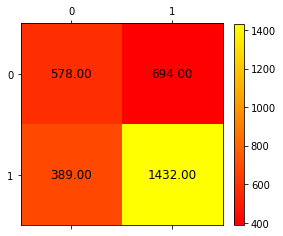

In [330]:
from sklearn.metrics import confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test,y_pred)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x,y, "%0.2f" %cm[x,y], size=12, color='black', ha='center', va='center')
plt.show()

In [331]:
roc_auc_score(y_test,y_pred)

0.6356451517188577

In [332]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()

In [333]:
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

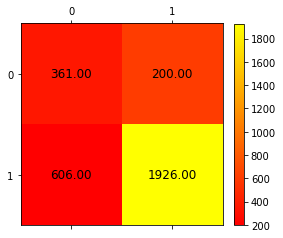

In [334]:
cm = confusion_matrix(y_test,y_pred)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x,y, "%0.2f" %cm[x,y], size=12, color='black', ha='center', va='center')
plt.show()

In [335]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.37      0.47       967
           1       0.76      0.91      0.83      2126

   micro avg       0.74      0.74      0.74      3093
   macro avg       0.70      0.64      0.65      3093
weighted avg       0.72      0.74      0.72      3093



In [336]:
roc_auc_score(y_test,y_pred)

0.6396230838751227

In [337]:
import xgboost as xgb
model = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=10)
#model = xgb.XGBClassifier(**xgb_params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [338]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       967
           1       0.78      0.89      0.83      2126

   micro avg       0.75      0.75      0.75      3093
   macro avg       0.72      0.67      0.68      3093
weighted avg       0.74      0.75      0.74      3093



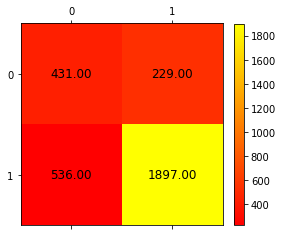

In [339]:
cm = confusion_matrix(y_test,y_pred)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x,y, "%0.2f" %cm[x,y], size=12, color='black', ha='center', va='center')
plt.show()

In [340]:
roc_auc_score(y_test,y_pred)

0.6689971797443578

In [341]:
X_train.shape

(27833, 19)

In [342]:
#!pip install hyperopt

In [343]:
#from hyperopt import hp, fmin, tpe, STATUS_OK

In [344]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BinaryClassifier(nn.Module):

    def __init__(self, input_features, hidden_dim, output_dim):
        super(BinaryClassifier, self).__init__()
        
        self.fc1 = nn.Linear(input_features,hidden_dim)
        self.fc2 = nn.Linear(hidden_dim,16)
        self.fc3 = nn.Linear(16,output_dim)
        #self.drop = nn.Dropout(0.5)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        #out = self.drop(out)
        out = self.fc3(out)
        return self.sig(out)
        

In [345]:
def train(model, train_loader, epochs, criterion, optimizer, device):
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        
        for batch in train_loader:
            
            batch_x, batch_y = batch
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            optimizer.zero_grad()
            # get predictions from model
            y_pred = model(batch_x)           
            # perform backprop
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step()           
            total_loss += loss.data.item()

        print("Epoch: {}, Loss: {}".format(epoch, total_loss / len(train_loader)))

In [346]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [347]:
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import torch.utils.data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BinaryClassifier(19, 24, 1).to(device)

print(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()


features_train = torch.from_numpy(X_train)
targets_train = torch.from_numpy(y_train)

features_Test = torch.from_numpy(X_test)
targets_Test = torch.from_numpy(y_test)

batch_size = 16
#n_iters = 10000
#num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = 50


train = torch.utils.data.TensorDataset(features_train,targets_train)
test = torch.utils.data.TensorDataset(features_Test,targets_Test)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


for epoch in range(1, num_epochs + 1):
        
        model.train()
        total_loss = 0
        
        for i, batch in enumerate(train_loader):
            
            batch_x, batch_y = batch
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            optimizer.zero_grad()
            # get predictions from model
            y_pred = model(batch_x)           
            # perform backprop
            loss = criterion(y_pred, batch_y)
            loss.backward()
            optimizer.step()           
            total_loss += loss.data.item()

        print("Epoch: {}, Loss: {}".format(epoch, total_loss / len(train_loader)))

cpu
Epoch: 1, Loss: 0.5545066479978891
Epoch: 2, Loss: 0.5222563841219606
Epoch: 3, Loss: 0.510549224630512
Epoch: 4, Loss: 0.5045401756105752
Epoch: 5, Loss: 0.5014443823232733
Epoch: 6, Loss: 0.4995549771463734
Epoch: 7, Loss: 0.49845532543700316
Epoch: 8, Loss: 0.4976054076405092
Epoch: 9, Loss: 0.49714939766402905
Epoch: 10, Loss: 0.4967203777668805
Epoch: 11, Loss: 0.4964551339889395
Epoch: 12, Loss: 0.49619166452823016
Epoch: 13, Loss: 0.49594962184114016
Epoch: 14, Loss: 0.4956963921329756
Epoch: 15, Loss: 0.4954845595120013
Epoch: 16, Loss: 0.49534131497487255
Epoch: 17, Loss: 0.4950770553501173
Epoch: 18, Loss: 0.49492545034522295
Epoch: 19, Loss: 0.494805507653061
Epoch: 20, Loss: 0.49452298084894813
Epoch: 21, Loss: 0.49433937560039004
Epoch: 22, Loss: 0.4942291377947248
Epoch: 23, Loss: 0.49404590802973714
Epoch: 24, Loss: 0.49384274478445106
Epoch: 25, Loss: 0.49379433533069733
Epoch: 26, Loss: 0.493662225206693
Epoch: 27, Loss: 0.4935516708455552
Epoch: 28, Loss: 0.493424

In [348]:
def predict_fn(input_data, model):
    print('Predicting class labels for the input data...')

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Process input_data so that it is ready to be sent to our model.
    data = torch.from_numpy(input_data.astype('float32'))
    data = data.to(device)

    # Put the model into evaluation mode
    model.eval()

    # Compute the result of applying the model to the input data
    # The variable `out_label` should be a rounded value, either 1 or 0
    out = model(data)
    out_np = out.cpu().detach().numpy()
    out_label = out_np.round()
    print(out_label)
    return out_label

In [349]:
predictions = predict_fn(X_test,model)

Predicting class labels for the input data...
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [350]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.48      0.54       967
         1.0       0.79      0.87      0.83      2126

   micro avg       0.75      0.75      0.75      3093
   macro avg       0.70      0.67      0.68      3093
weighted avg       0.73      0.75      0.74      3093



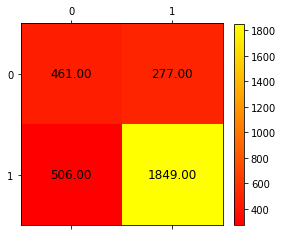

In [351]:
cm = confusion_matrix(y_test,predictions)
img = plt.matshow(cm, cmap=plt.cm.autumn)
plt.colorbar(img, fraction=0.045)
for x in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(x,y, "%0.2f" %cm[x,y], size=12, color='black', ha='center', va='center')
plt.show()

In [352]:
roc_auc_score(y_test,predictions)

0.6732202669271277